In [36]:
import matplotlib.pyplot as plt
import os
import json
import pandas as pd

In [64]:
model_types = [
    "vanilla",
    "double",
    "double"
    ]
model_details = [
    "",
    "_hard",
    "_soft"
    ]

In [65]:
all_data = {}

for model_type, model_detail in zip(model_types, model_details):

    checkpoint_path = f"./{model_type}_DQN/checkpoints{model_detail}"
    
    # List all files in the directory
    all_files = os.listdir(checkpoint_path)

    # Filter files that match the pattern "data_<number>.json"
    json_files = [file for file in all_files if file.startswith("data_") and file.endswith(".json")]

    # Sort files based on the final number of dictionaries
    json_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Initialize an empty list to store the dictionaries
    checkpoint_data = []

    # Iterate over the sorted JSON files and load the content
    for json_file in json_files:
        file_path = os.path.join(checkpoint_path, json_file)
        with open(file_path, 'r') as file:
            data = json.load(file)
        checkpoint_data.extend(data)
    
    df = pd.DataFrame(checkpoint_data)

    # Add a new column 'episodes' with the same values as the index
    df['games'] = df.index

    key = model_type + model_detail
    all_data[key] = df

In [66]:
all_data_keys = all_data.keys()
print(all_data_keys)

dict_keys(['vanilla', 'double_hard', 'double_soft'])


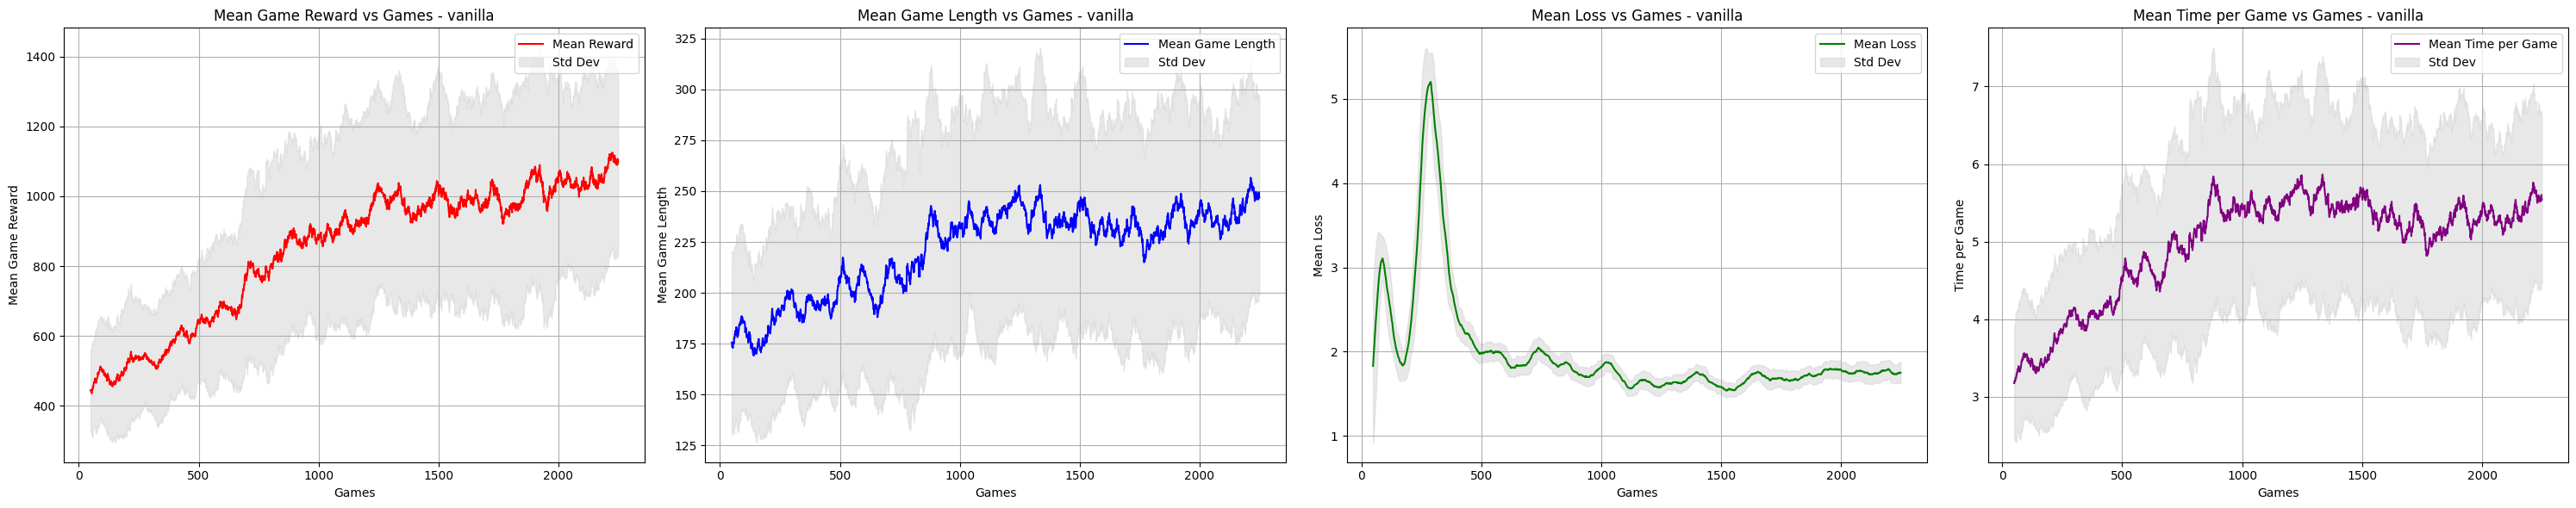

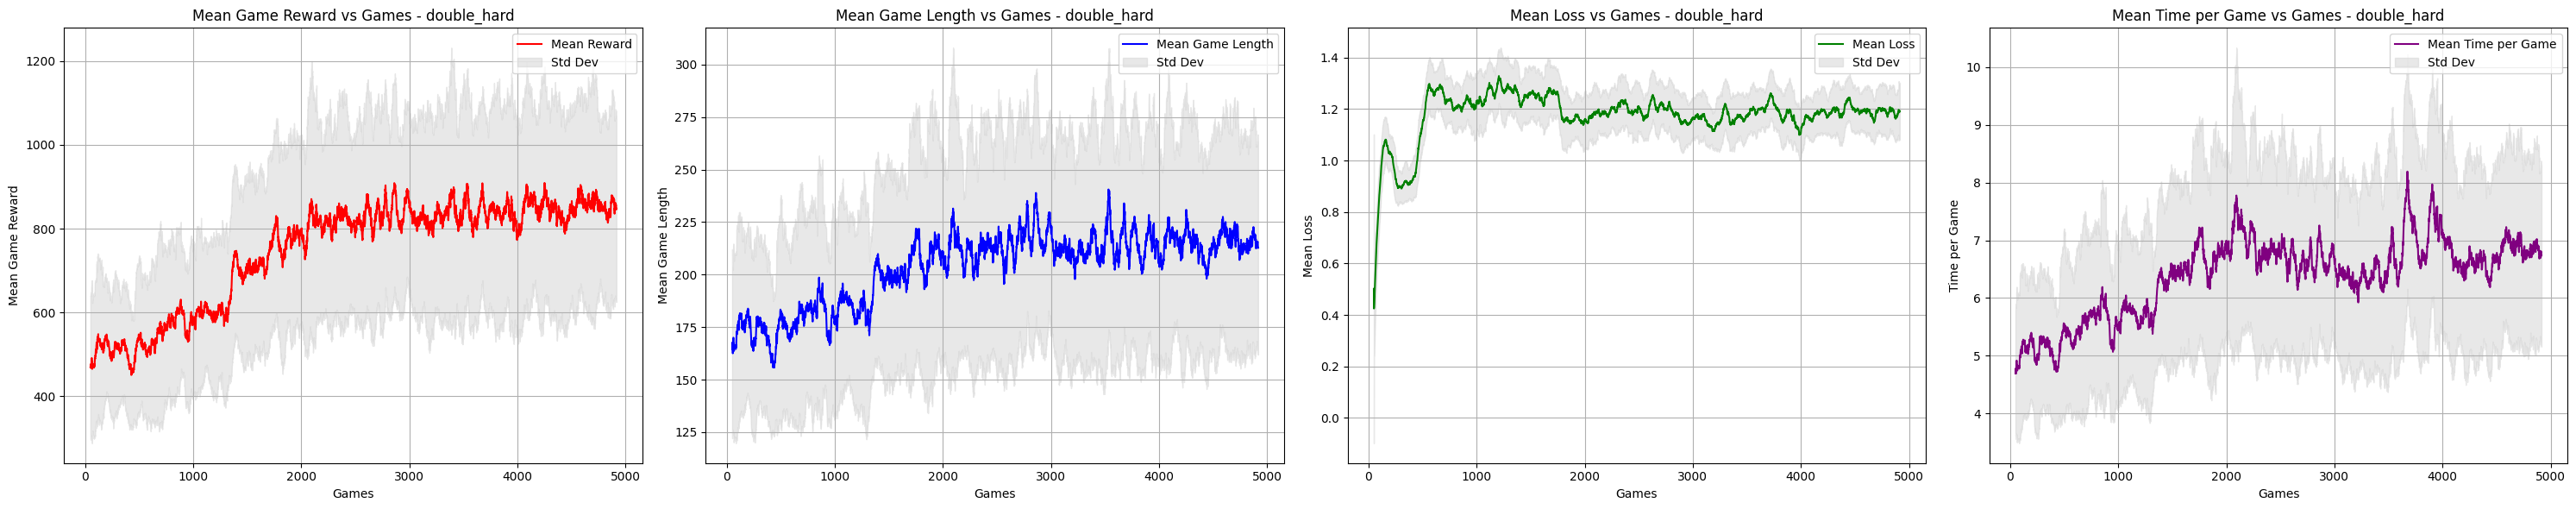

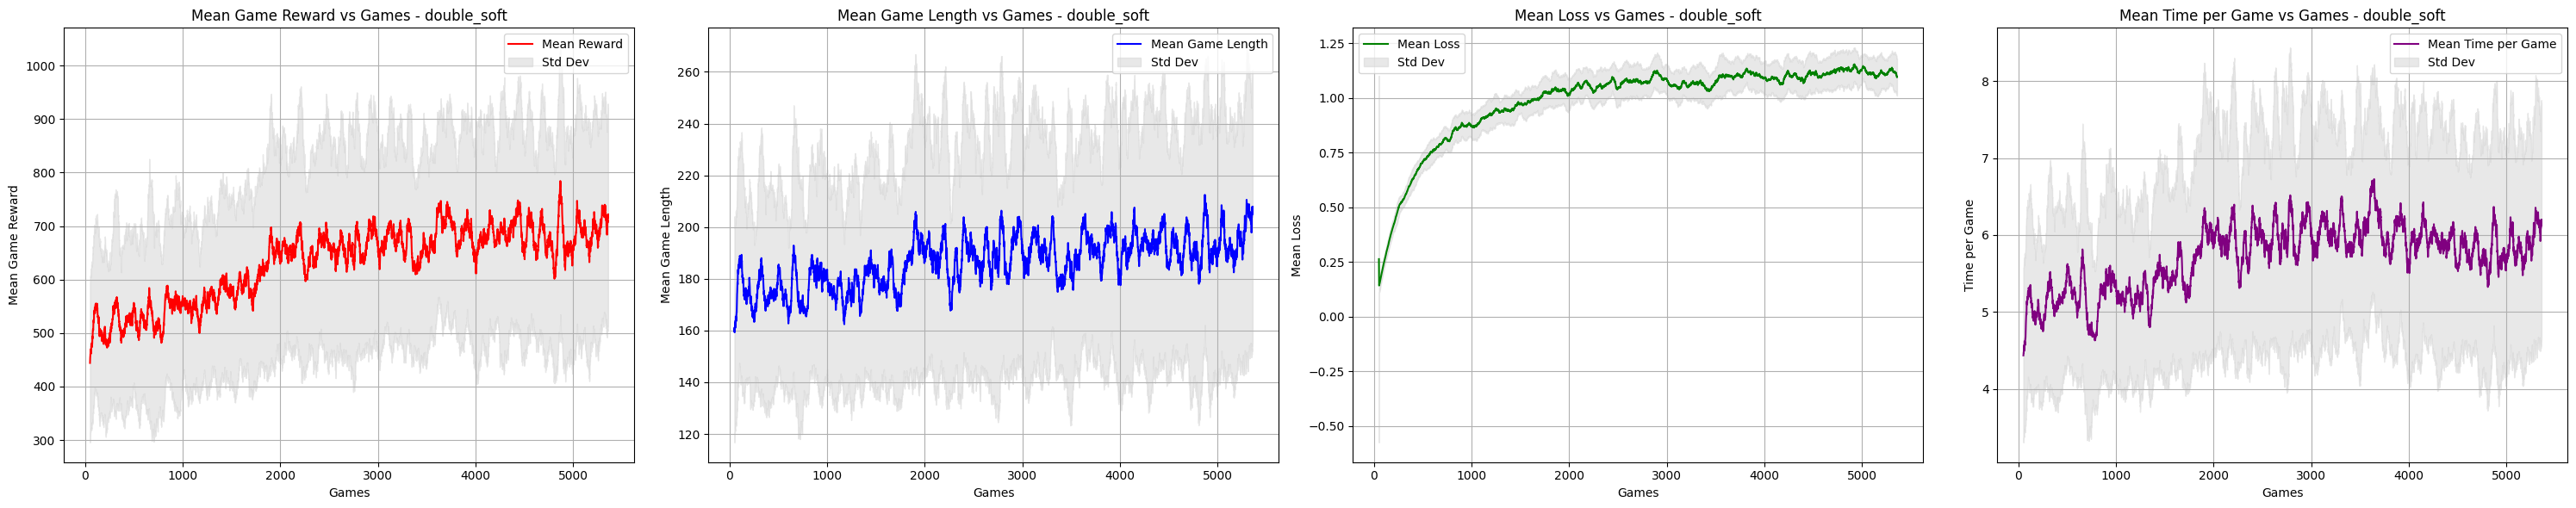

In [67]:
# Assuming you have a dictionary of dataframes named 'dataframes'
selected_keys = all_data_keys # Replace with the keys you want to compare
plots_per_row = 4  # Number of plots per row

# Define a list of colors for each graph
colors = ['red', 'blue', 'green', 'purple']

for key in selected_keys:
    df = all_data[key]

    # Plot mean and std for 'reward'
    rolling_mean = df['reward'].rolling(window=50).mean()
    rolling_std = df['reward'].rolling(window=50).std()

    plt.figure(figsize=(30, 6))

    plt.subplot(1, plots_per_row, 1)
    plt.plot(df['games'], rolling_mean, color=colors[0], label='Mean Reward')
    plt.fill_between(df['games'], rolling_mean - rolling_std, rolling_mean + rolling_std, color='lightgray', label='Std Dev', alpha=0.5)
    plt.xlabel('Games')
    plt.ylabel('Mean Game Reward')
    plt.title(f'Mean Game Reward vs Games - {key}')
    plt.grid(True)
    plt.legend()

    # Plot mean and std for 'len'
    game_len_mean = df['len'].rolling(window=50).mean()
    game_len_std = df['len'].rolling(window=50).std()

    plt.subplot(1, plots_per_row, 2)
    plt.plot(df['games'], game_len_mean, color=colors[1], label='Mean Game Length')
    plt.fill_between(df['games'], game_len_mean - game_len_std, game_len_mean + game_len_std, color='lightgray', label='Std Dev', alpha=0.5)
    plt.xlabel('Games')
    plt.ylabel('Mean Game Length')
    plt.title(f'Mean Game Length vs Games - {key}')
    plt.grid(True)
    plt.legend()

    # Plot mean and std for 'loss_mean'
    loss_mean = df['loss_mean'].rolling(window=50).mean()
    loss_std = df['loss_mean'].rolling(window=50).std()

    plt.subplot(1, plots_per_row, 3)
    plt.plot(df['games'], loss_mean, color=colors[2], label='Mean Loss')
    plt.fill_between(df['games'], loss_mean - loss_std, loss_mean + loss_std, color='lightgray', label='Std Dev', alpha=0.5)
    plt.xlabel('Games')
    plt.ylabel('Mean Loss')
    plt.title(f'Mean Loss vs Games - {key}')
    plt.grid(True)
    plt.legend()

    # Plot mean and std for 'time_per_episode'
    df['time_per_episode'] = df['time'].diff()

    time_per_episode_mean = df['time_per_episode'].rolling(window=50).mean()
    time_per_episode_std = df['time_per_episode'].rolling(window=50).std()

    plt.subplot(1, plots_per_row, 4)
    plt.plot(df['games'], time_per_episode_mean, color=colors[3], label='Mean Time per Game')
    plt.fill_between(df['games'], time_per_episode_mean - time_per_episode_std, time_per_episode_mean + time_per_episode_std, color='lightgray', label='Std Dev', alpha=0.5)
    plt.xlabel('Games')
    plt.ylabel('Time per Game')
    plt.title(f'Mean Time per Game vs Games - {key}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()